In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_csv('you_tube_data.csv')

In [3]:
data.head()

,Unnamed: 0,title,video_id,channel_name,views,duration,url
0,0,Python Tutorial - Python Full Course for Begin...,_uQrJ0TkZlc,Programming with Mosh,37M views,6:14:07,https://www.youtube.com/watch?v=_uQrJ0TkZlc
1,1,Python for Beginners - Learn Python in 1 Hour,kqtD5dpn9C8,Programming with Mosh,15M views,1:00:06,https://www.youtube.com/watch?v=kqtD5dpn9C8
2,2,Learn Python - Full Course for Beginners [Tuto...,rfscVS0vtbw,freeCodeCamp.org,43M views,4:26:52,https://www.youtube.com/watch?v=rfscVS0vtbw
3,3,Python Full Course for free 🐍,XKHEtdqhLK8,Bro Code,15M views,12:00:00,https://www.youtube.com/watch?v=XKHEtdqhLK8
4,4,Harvard CS50’s Introduction to Programming wit...,nLRL_NcnK-4,freeCodeCamp.org,3.5M views,15:57:48,https://www.youtube.com/watch?v=nLRL_NcnK-4


In [4]:
data.shape

(180, 7)

In [5]:
data.columns

Index(['Unnamed: 0', 'title', 'video_id', 'channel_name', 'views', 'duration',
       'url'],
      dtype='object')

In [6]:
data['title']

0      Python Tutorial - Python Full Course for Begin...
1          Python for Beginners - Learn Python in 1 Hour
2      Learn Python - Full Course for Beginners [Tuto...
3                          Python Full Course for free 🐍
4      Harvard CS50’s Introduction to Programming wit...
                             ...                        
175    Python Integer Trick?? #python #coding #progra...
176           Python 101: Learn the 5 Must-Know Concepts
177                               Python Yield Keyword??
178    How to be a Python Programmer in 4 steps 👩‍💻🐍 ...
179                 Python Django Tutorial for Beginners
Name: title, Length: 180, dtype: object

In [7]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
data

,title,video_id,channel_name,views,duration,url
0,Python Tutorial - Python Full Course for Begin...,_uQrJ0TkZlc,Programming with Mosh,37M views,6:14:07,https://www.youtube.com/watch?v=_uQrJ0TkZlc
1,Python for Beginners - Learn Python in 1 Hour,kqtD5dpn9C8,Programming with Mosh,15M views,1:00:06,https://www.youtube.com/watch?v=kqtD5dpn9C8
2,Learn Python - Full Course for Beginners [Tuto...,rfscVS0vtbw,freeCodeCamp.org,43M views,4:26:52,https://www.youtube.com/watch?v=rfscVS0vtbw
3,Python Full Course for free 🐍,XKHEtdqhLK8,Bro Code,15M views,12:00:00,https://www.youtube.com/watch?v=XKHEtdqhLK8
4,Harvard CS50’s Introduction to Programming wit...,nLRL_NcnK-4,freeCodeCamp.org,3.5M views,15:57:48,https://www.youtube.com/watch?v=nLRL_NcnK-4
...,...,...,...,...,...,...
175,Python Integer Trick?? #python #coding #progra...,FsbByDKPMoc,b001,2.5M views,0:37,https://www.youtube.com/watch?v=FsbByDKPMoc
176,Python 101: Learn the 5 Must-Know Concepts,mMv6OSuitWw,Tech With Tim,890K views,20:00,https://www.youtube.com/watch?v=mMv6OSuitWw
177,Python Yield Keyword??,HnggP09mKpM,b001,107K views,3:18,https://www.youtube.com/watch?v=HnggP09mKpM
178,How to be a Python Programmer in 4 steps 👩‍💻🐍 ...,Pl9RxjJ5--4,Coding with Lewis,675K views,0:35,https://www.youtube.com/watch?v=Pl9RxjJ5--4


In [9]:
def null_values(d):
    print(d.isnull().sum())
    print("\nTotal number of null values:", d.isnull().sum().sum())
    
null_values(data)

title           0
video_id        0
channel_name    0
views           1
duration        1
url             0
dtype: int64

Total number of null values: 2


In [10]:
data['title'].unique()

array(['Python Tutorial - Python Full Course for Beginners',
       'Python for Beginners - Learn Python in 1 Hour',
       'Learn Python - Full Course for Beginners [Tutorial]',
       'Python Full Course for free 🐍',
       'Harvard CS50’s Introduction to Programming with Python – Full University Course',
       'Python Tutorial for Beginners - Learn Python in 5 Hours [FULL COURSE]',
       'Intermediate Python Programming Course',
       'Python Functions | Python Tutorial for Absolute Beginners #1',
       'Python Tutorial #9 Tuple in Python',
       'Python for Beginners – Full Course [Programming Tutorial]',
       'The complete guide to Python',
       'Python Tutorial for Beginners (Full Course) at @shradhaKD  | Republic Day Gift',
       '#2 Python Tutorial for Beginners | Python Installation | PyCharm',
       'Python Tutorial for Beginners in Hindi | Applications of Python | History of Python',
       'Python Tutorial for Beginners in Hindi | What is Python | Introduction to

In [11]:
#function to handle emoji classification
def emoji(title_data):
    title_data = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', title_data)
    title_data = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', title_data)
    title_data = re.sub(r'(<3|:\*)', ' positiveemoji ', title_data)
    title_data = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', title_data)
    title_data = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', title_data)
    title_data = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', title_data)
    return title_data

In [12]:
#function to clean the 'title' column
def process_title(title_data):
    title_data = title_data.lower()                                             # Lowercases the string
    title_data = re.sub('@[^\s]+', '', title_data)                              # Removes usernames
    title_data = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', title_data)   # Remove URLs
    title_data = re.sub(r"\d+", " ", str(title_data))                           # Removes all digits
    title_data = re.sub('&quot;'," ", title_data)                               # Remove (&quot;) 
    title_data = emoji(title_data)                                              # Replaces Emojis
    title_data = re.sub(r"\b[a-zA-Z]\b", "", str(title_data))                   # Removes all single characters
    title_data = re.sub(r"[^\w\s]", " ", str(title_data))                       # Removes all punctuations
    title_data = re.sub(r'(.)\1+', r'\1\1', title_data)                         # Convert more than 2 letter repetitions to 2 letter
    title_data = re.sub(r"\s+", " ", str(title_data))                           # Replaces double spaces with single space    
    return title_data

In [13]:
data['processed_title'] = np.vectorize(process_title)(data['title'])

In [14]:
data.head()

,title,video_id,channel_name,views,duration,url,processed_title
0,Python Tutorial - Python Full Course for Begin...,_uQrJ0TkZlc,Programming with Mosh,37M views,6:14:07,https://www.youtube.com/watch?v=_uQrJ0TkZlc,python tutorial python full course for beginners
1,Python for Beginners - Learn Python in 1 Hour,kqtD5dpn9C8,Programming with Mosh,15M views,1:00:06,https://www.youtube.com/watch?v=kqtD5dpn9C8,python for beginners learn python in hour
2,Learn Python - Full Course for Beginners [Tuto...,rfscVS0vtbw,freeCodeCamp.org,43M views,4:26:52,https://www.youtube.com/watch?v=rfscVS0vtbw,learn python full course for beginners tutorial
3,Python Full Course for free 🐍,XKHEtdqhLK8,Bro Code,15M views,12:00:00,https://www.youtube.com/watch?v=XKHEtdqhLK8,python full course for free
4,Harvard CS50’s Introduction to Programming wit...,nLRL_NcnK-4,freeCodeCamp.org,3.5M views,15:57:48,https://www.youtube.com/watch?v=nLRL_NcnK-4,harvard cs introduction to programming with py...


In [15]:
data['processed_title']

0       python tutorial python full course for beginners
1              python for beginners learn python in hour
2       learn python full course for beginners tutorial 
3                           python full course for free 
4      harvard cs introduction to programming with py...
                             ...                        
175       python integer trick python coding programming
176                  python learn the must know concepts
177                                python yield keyword 
178    how to be python programmer in steps technolog...
179                 python django tutorial for beginners
Name: processed_title, Length: 180, dtype: object

In [16]:
tokenized_title = data['processed_title'].apply(lambda x: x.split())
tokenized_title.head()

0    [python, tutorial, python, full, course, for, ...
1    [python, for, beginners, learn, python, in, hour]
2    [learn, python, full, course, for, beginners, ...
3                    [python, full, course, for, free]
4    [harvard, cs, introduction, to, programming, w...
Name: processed_title, dtype: object

In [17]:
data['views'].unique()

array(['37M views', '15M views', '43M views', '3.5M views', '5.3M views',
       '3.4M views', '839K views', '1 view', '2M views', '374K views',
       '146K views', '169K views', '60 views', '69 views', '840 views',
       '144 views', '121 views', '2.6M views', '272K views', '424K views',
       '1.3M views', '1.6M views', '890K views', '8.8M views',
       '6.4M views', '2.1M views', '6 views', '132K views', '73K views',
       '14K views', '64 views', '28 views', '16 views', '92 views',
       '2.3M views', '1.4M views', '130K views', '641K views',
       '3.1M views', '843K views', '1.8M views', '915K views',
       '1.2M views', '22K views', '121K views', '4.9M views',
       '311K views', '216K views', '225K views', '468K views',
       '76K views', '338 views', '3.8K views', '48K views', '86K views',
       '8.4K views', '276K views', '103K views', '19K views', '40K views',
       '411K views', '9.1K views', '688K views', '7.8M views',
       '418K views', '27K views', '5M view

In [18]:
data['views'] = data['views'].str.replace(" views","") 

new = [] 
  
for i in data['views']: 
    if isinstance(i, str):  # Check if it's a string
        if i.endswith('K'): 
            i = float(i.replace('K','')) * 1000 
        elif i.endswith('M'):
            i = float(i.replace('M','')) * 1000000 
        else : 
            i = i
    new.append(i) 

data['Views'] = new

In [19]:
data.columns

Index(['title', 'video_id', 'channel_name', 'views', 'duration', 'url',
       'processed_title', 'Views'],
      dtype='object')

In [20]:
data['Views']

0      37000000.0
1      15000000.0
2      43000000.0
3      15000000.0
4       3500000.0
          ...    
175     2500000.0
176      890000.0
177      107000.0
178      675000.0
179     2100000.0
Name: Views, Length: 180, dtype: object

In [ ]:
data.head()

In [34]:
# Define a function to extract hours, minutes, and seconds from a duration string
def extract_duration_parts(duration_str):
    if isinstance(duration_str, str):
        parts = duration_str.split(':')
        hours = int(parts[0]) if len(parts) > 0 else 0
        minutes = int(parts[1]) if len(parts) > 1 else 0
        seconds = int(parts[2]) if len(parts) > 2 else 0
    else:
        hours = 0
        minutes = 0
        seconds = duration_str
    return hours, minutes, seconds

# Apply the function to each row in the 'duration' column and create new columns for hours, minutes, and seconds
data[['Hours', 'Minutes', 'Seconds']] = data['duration'].apply(lambda x: pd.Series(extract_duration_parts(x)))

In [36]:
# Define a function to extract hours, minutes, and seconds from a duration string
def extract_duration_parts(duration_str):
    if isinstance(duration_str, str):
        parts = duration_str.split(':')
        hours = int(parts[0]) if len(parts) > 0 else 0
        minutes = int(parts[1]) if len(parts) > 1 else 0
        seconds = int(parts[2]) if len(parts) > 2 else 0
    else:
        hours = int(duration_str) if not np.isnan(duration_str) else 0
        minutes = 0
        seconds = 0
    return hours, minutes, seconds

# Apply the function to each row in the 'duration' column and create new columns for hours, minutes, and seconds
data[['Hours', 'Minutes', 'Seconds']] = data['duration'].apply(lambda x: pd.Series(extract_duration_parts(x)))

In [37]:
data.head()

,title,video_id,channel_name,views,duration,url,processed_title,Views,Duration,Hours,Minutes,Seconds
0,Python Tutorial - Python Full Course for Begin...,_uQrJ0TkZlc,Programming with Mosh,37M,6:14:07,https://www.youtube.com/watch?v=_uQrJ0TkZlc,python tutorial python full course for beginners,37000000.0,Very-Long-Videos,6,14,7
1,Python for Beginners - Learn Python in 1 Hour,kqtD5dpn9C8,Programming with Mosh,15M,1:00:06,https://www.youtube.com/watch?v=kqtD5dpn9C8,python for beginners learn python in hour,15000000.0,Very-Long-Videos,1,0,6
2,Learn Python - Full Course for Beginners [Tuto...,rfscVS0vtbw,freeCodeCamp.org,43M,4:26:52,https://www.youtube.com/watch?v=rfscVS0vtbw,learn python full course for beginners tutorial,43000000.0,Very-Long-Videos,4,26,52
3,Python Full Course for free 🐍,XKHEtdqhLK8,Bro Code,15M,12:00:00,https://www.youtube.com/watch?v=XKHEtdqhLK8,python full course for free,15000000.0,Very-Long-Videos,12,0,0
4,Harvard CS50’s Introduction to Programming wit...,nLRL_NcnK-4,freeCodeCamp.org,3.5M,15:57:48,https://www.youtube.com/watch?v=nLRL_NcnK-4,harvard cs introduction to programming with py...,3500000.0,Very-Long-Videos,15,57,48


In [38]:
data['duration'] = data['duration'].str.replace("\n","") 
  
new2 = [] 
  
for i in data['duration']: 
    if isinstance(i, str):  # Check if it's a string
        if i=='SHORTS' or len(i.split(':'))==1: 
            new2.append(i) 
        elif len(i.split(':'))==2: 
            i = i.split(':') 
            tim = int(i[0])*60 + int(i[1]) 
            new2.append(tim) 
        elif len(i.split(':'))==3: 
            i = i.split(':') 
            tim = int(i[0])*3600 + int(i[1])*60 + int(i[2]) 
            new2.append(tim) 
    else:
        new2.append(i)  # Append as it is if it's already a float
          
data['Duration'] = new2

In [39]:
data.columns

Index(['title', 'video_id', 'channel_name', 'views', 'duration', 'url',
       'processed_title', 'Views', 'Duration', 'Hours', 'Minutes', 'Seconds'],
      dtype='object')

In [40]:
data['Duration']

0      22447.0
1       3606.0
2      16012.0
3      43200.0
4      57468.0
        ...   
175       37.0
176     1200.0
177      198.0
178       35.0
179     3756.0
Name: Duration, Length: 180, dtype: float64

In [41]:
# Duration column categorization 
for i in data['Duration'].index: 
    val = data['Duration'].iloc[i] 
    if(val=='  SHORTS'): 
        continue
    elif(val in range(0, 900)): 
        data.loc[i,'Duration'] = 'Short-Videos'
    elif(val in range(901, 3600)): 
        data.loc[i,'Duration'] = 'Long-Videos'
    else: 
        data.loc[i,'Duration'] = 'Very-Long-Videos'

In [42]:
data['Duration']

0      Very-Long-Videos
1      Very-Long-Videos
2      Very-Long-Videos
3      Very-Long-Videos
4      Very-Long-Videos
             ...       
175        Short-Videos
176         Long-Videos
177        Short-Videos
178        Short-Videos
179    Very-Long-Videos
Name: Duration, Length: 180, dtype: object

In [43]:
data['Duration'].unique()

array(['Very-Long-Videos', 'Long-Videos', 'Short-Videos'], dtype=object)

In [44]:
data.head()

,title,video_id,channel_name,views,duration,url,processed_title,Views,Duration,Hours,Minutes,Seconds
0,Python Tutorial - Python Full Course for Begin...,_uQrJ0TkZlc,Programming with Mosh,37M,6:14:07,https://www.youtube.com/watch?v=_uQrJ0TkZlc,python tutorial python full course for beginners,37000000.0,Very-Long-Videos,6,14,7
1,Python for Beginners - Learn Python in 1 Hour,kqtD5dpn9C8,Programming with Mosh,15M,1:00:06,https://www.youtube.com/watch?v=kqtD5dpn9C8,python for beginners learn python in hour,15000000.0,Very-Long-Videos,1,0,6
2,Learn Python - Full Course for Beginners [Tuto...,rfscVS0vtbw,freeCodeCamp.org,43M,4:26:52,https://www.youtube.com/watch?v=rfscVS0vtbw,learn python full course for beginners tutorial,43000000.0,Very-Long-Videos,4,26,52
3,Python Full Course for free 🐍,XKHEtdqhLK8,Bro Code,15M,12:00:00,https://www.youtube.com/watch?v=XKHEtdqhLK8,python full course for free,15000000.0,Very-Long-Videos,12,0,0
4,Harvard CS50’s Introduction to Programming wit...,nLRL_NcnK-4,freeCodeCamp.org,3.5M,15:57:48,https://www.youtube.com/watch?v=nLRL_NcnK-4,harvard cs introduction to programming with py...,3500000.0,Very-Long-Videos,15,57,48


In [45]:
data['title'].unique()

array(['Python Tutorial - Python Full Course for Beginners',
       'Python for Beginners - Learn Python in 1 Hour',
       'Learn Python - Full Course for Beginners [Tutorial]',
       'Python Full Course for free 🐍',
       'Harvard CS50’s Introduction to Programming with Python – Full University Course',
       'Python Tutorial for Beginners - Learn Python in 5 Hours [FULL COURSE]',
       'Intermediate Python Programming Course',
       'Python Functions | Python Tutorial for Absolute Beginners #1',
       'Python Tutorial #9 Tuple in Python',
       'Python for Beginners – Full Course [Programming Tutorial]',
       'The complete guide to Python',
       'Python Tutorial for Beginners (Full Course) at @shradhaKD  | Republic Day Gift',
       '#2 Python Tutorial for Beginners | Python Installation | PyCharm',
       'Python Tutorial for Beginners in Hindi | Applications of Python | History of Python',
       'Python Tutorial for Beginners in Hindi | What is Python | Introduction to

In [46]:
import re 
from tqdm import tqdm 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
def preprocess_text(text_data): 
    preprocessed_text = [] 
      
    for sentence in tqdm(text_data): 
        sentence = re.sub(r'[^\w\s]', '', sentence) 
        preprocessed_text.append(' '.join(token.lower() 
                                  for token in str(sentence).split() 
                                  if token not in stopwords.words('english'))) 
  
    return preprocessed_text 
    
preprocessed_review = preprocess_text(data['title'].values) 
data['Title'] = preprocessed_review

100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [00:02<00:00, 63.25it/s]


In [48]:
data.head()

,title,video_id,channel_name,views,duration,url,processed_title,Views,Duration,Hours,Minutes,Seconds,Title
0,Python Tutorial - Python Full Course for Begin...,_uQrJ0TkZlc,Programming with Mosh,37M,6:14:07,https://www.youtube.com/watch?v=_uQrJ0TkZlc,python tutorial python full course for beginners,37000000.0,Very-Long-Videos,6,14,7,python tutorial python full course beginners
1,Python for Beginners - Learn Python in 1 Hour,kqtD5dpn9C8,Programming with Mosh,15M,1:00:06,https://www.youtube.com/watch?v=kqtD5dpn9C8,python for beginners learn python in hour,15000000.0,Very-Long-Videos,1,0,6,python beginners learn python 1 hour
2,Learn Python - Full Course for Beginners [Tuto...,rfscVS0vtbw,freeCodeCamp.org,43M,4:26:52,https://www.youtube.com/watch?v=rfscVS0vtbw,learn python full course for beginners tutorial,43000000.0,Very-Long-Videos,4,26,52,learn python full course beginners tutorial
3,Python Full Course for free 🐍,XKHEtdqhLK8,Bro Code,15M,12:00:00,https://www.youtube.com/watch?v=XKHEtdqhLK8,python full course for free,15000000.0,Very-Long-Videos,12,0,0,python full course free
4,Harvard CS50’s Introduction to Programming wit...,nLRL_NcnK-4,freeCodeCamp.org,3.5M,15:57:48,https://www.youtube.com/watch?v=nLRL_NcnK-4,harvard cs introduction to programming with py...,3500000.0,Very-Long-Videos,15,57,48,harvard cs50s introduction programming python ...


In [49]:
from wordcloud import WordCloud 

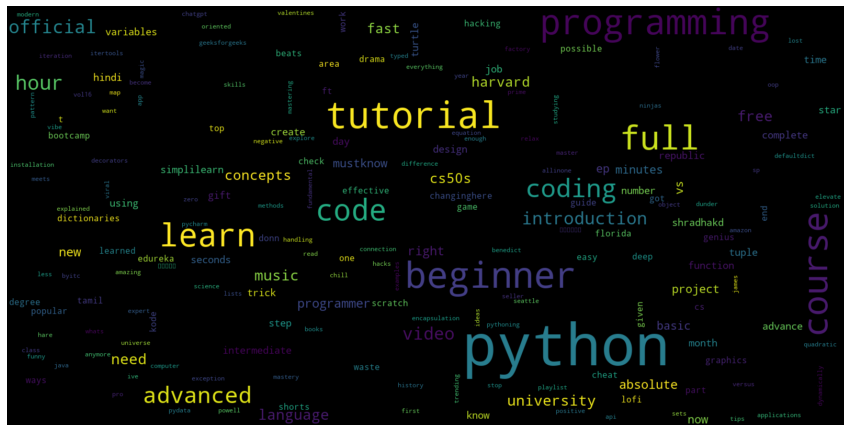

In [50]:
consolidated = ' '.join(word for word in data['Title'].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, random_state=21, 
                      max_font_size=110, collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration', ylabel='count'>

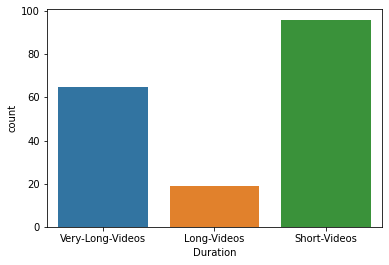

In [51]:
sns.countplot(data['Duration'])

In [53]:
# Function to extract hashtags from text
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    return hashtags

# Apply the function to the 'title' column
data['hashtags'] = data['title'].apply(extract_hashtags)

In [57]:
data['hashtags']

0                                                     []
1                                                     []
2                                                     []
3                                                     []
4                                                     []
                             ...                        
175                     [#python, #coding, #programming]
176                                                   []
177                                                   []
178    [#technology, #programming, #software, #career...
179                                                   []
Name: hashtags, Length: 180, dtype: object

In [59]:
data.tail()

,title,video_id,channel_name,views,duration,url,processed_title,Views,Duration,Hours,Minutes,Seconds,Title,hashtags
175,Python Integer Trick?? #python #coding #progra...,FsbByDKPMoc,b001,2.5M,0:37,https://www.youtube.com/watch?v=FsbByDKPMoc,python integer trick python coding programming,2500000.0,Short-Videos,0,37,0,python integer trick python coding programming,"[#python, #coding, #programming]"
176,Python 101: Learn the 5 Must-Know Concepts,mMv6OSuitWw,Tech With Tim,890K,20:00,https://www.youtube.com/watch?v=mMv6OSuitWw,python learn the must know concepts,890000.0,Long-Videos,20,0,0,python 101 learn 5 mustknow concepts,[]
177,Python Yield Keyword??,HnggP09mKpM,b001,107K,3:18,https://www.youtube.com/watch?v=HnggP09mKpM,python yield keyword,107000.0,Short-Videos,3,18,0,python yield keyword,[]
178,How to be a Python Programmer in 4 steps 👩‍💻🐍 ...,Pl9RxjJ5--4,Coding with Lewis,675K,0:35,https://www.youtube.com/watch?v=Pl9RxjJ5--4,how to be python programmer in steps technolog...,675000.0,Short-Videos,0,35,0,how python programmer 4 steps technology progr...,"[#technology, #programming, #software, #career..."
179,Python Django Tutorial for Beginners,rHux0gMZ3Eg,Programming with Mosh,2.1M,1:02:36,https://www.youtube.com/watch?v=rHux0gMZ3Eg,python django tutorial for beginners,2100000.0,Very-Long-Videos,1,2,36,python django tutorial beginners,[]


In [60]:
# Function to check if 'python' is present in the title
def check_python(title):
    return 'python' in title.lower()

# Apply the function to create the 'technology' column
data['technology'] = data['title'].apply(check_python)

# Convert boolean values to 'python' or None
data['technology'] = data['technology'].apply(lambda x: 'python' if x else None)

In [61]:
data.head()

,title,video_id,channel_name,views,duration,url,processed_title,Views,Duration,Hours,Minutes,Seconds,Title,hashtags,technology
0,Python Tutorial - Python Full Course for Begin...,_uQrJ0TkZlc,Programming with Mosh,37M,6:14:07,https://www.youtube.com/watch?v=_uQrJ0TkZlc,python tutorial python full course for beginners,37000000.0,Very-Long-Videos,6,14,7,python tutorial python full course beginners,[],python
1,Python for Beginners - Learn Python in 1 Hour,kqtD5dpn9C8,Programming with Mosh,15M,1:00:06,https://www.youtube.com/watch?v=kqtD5dpn9C8,python for beginners learn python in hour,15000000.0,Very-Long-Videos,1,0,6,python beginners learn python 1 hour,[],python
2,Learn Python - Full Course for Beginners [Tuto...,rfscVS0vtbw,freeCodeCamp.org,43M,4:26:52,https://www.youtube.com/watch?v=rfscVS0vtbw,learn python full course for beginners tutorial,43000000.0,Very-Long-Videos,4,26,52,learn python full course beginners tutorial,[],python
3,Python Full Course for free 🐍,XKHEtdqhLK8,Bro Code,15M,12:00:00,https://www.youtube.com/watch?v=XKHEtdqhLK8,python full course for free,15000000.0,Very-Long-Videos,12,0,0,python full course free,[],python
4,Harvard CS50’s Introduction to Programming wit...,nLRL_NcnK-4,freeCodeCamp.org,3.5M,15:57:48,https://www.youtube.com/watch?v=nLRL_NcnK-4,harvard cs introduction to programming with py...,3500000.0,Very-Long-Videos,15,57,48,harvard cs50s introduction programming python ...,[],python


In [62]:
data.tail()

,title,video_id,channel_name,views,duration,url,processed_title,Views,Duration,Hours,Minutes,Seconds,Title,hashtags,technology
175,Python Integer Trick?? #python #coding #progra...,FsbByDKPMoc,b001,2.5M,0:37,https://www.youtube.com/watch?v=FsbByDKPMoc,python integer trick python coding programming,2500000.0,Short-Videos,0,37,0,python integer trick python coding programming,"[#python, #coding, #programming]",python
176,Python 101: Learn the 5 Must-Know Concepts,mMv6OSuitWw,Tech With Tim,890K,20:00,https://www.youtube.com/watch?v=mMv6OSuitWw,python learn the must know concepts,890000.0,Long-Videos,20,0,0,python 101 learn 5 mustknow concepts,[],python
177,Python Yield Keyword??,HnggP09mKpM,b001,107K,3:18,https://www.youtube.com/watch?v=HnggP09mKpM,python yield keyword,107000.0,Short-Videos,3,18,0,python yield keyword,[],python
178,How to be a Python Programmer in 4 steps 👩‍💻🐍 ...,Pl9RxjJ5--4,Coding with Lewis,675K,0:35,https://www.youtube.com/watch?v=Pl9RxjJ5--4,how to be python programmer in steps technolog...,675000.0,Short-Videos,0,35,0,how python programmer 4 steps technology progr...,"[#technology, #programming, #software, #career...",python
179,Python Django Tutorial for Beginners,rHux0gMZ3Eg,Programming with Mosh,2.1M,1:02:36,https://www.youtube.com/watch?v=rHux0gMZ3Eg,python django tutorial for beginners,2100000.0,Very-Long-Videos,1,2,36,python django tutorial beginners,[],python
